**<h1> Importing Libraries**

In [1]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Conv2DTranspose,LeakyReLU,Reshape,BatchNormalization,Dropout
import time
from IPython import display


**<h2> Loading Data Function**

In [2]:
from keras.datasets.mnist import load_data
def load_minst_data():
    (x_train, y_train), (x_test, y_test) = load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)


Using TensorFlow backend.


**<h2>Getting the optimizer**

In [16]:
def get_optimizer():
  return (tf.keras.optimizers.Adam(learning_rate=0.0002,beta_1=0.5))

**<h2> Getting intializer Function**

In [4]:
def get_intializer():
  return(tf.keras.initializers.RandomNormal(stddev=0.02))

**<h2>Getting the Noise Parameter for GAN**

In [5]:
def get_noise(batch_size,random_dim):
  return(np.random.normal(0,1,size=[batch_size,random_dim]))

**<h2>Generator Architecture**

In [6]:
def generator(optimizer,initializer):
  model=Sequential()
  model.add(Dense(256,input_dim=random_dim,kernel_initializer=initializer))
  model.add(LeakyReLU(0.2))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(Dense(784, activation='tanh'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer)
  return model


**<h2>Discriminator Architecture**

In [7]:
def discriminator(optimizer,initializer):
  model=Sequential()
  model.add(Dense(1024,input_dim=784,kernel_initializer=initializer))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.3))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.3))
  model.add(Dense(256))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.3))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer=optimizer)
  return model
  

**<h2>Compiling GAN̈**

In [8]:
random_dim=100
def gan_compile(disc,random_dim,gen,optimizer):
  disc.trainable=False
  gan_input=tf.keras.Input(shape=(random_dim,))
  x=gen(gan_input)
  gan_output=disc(x)
  gan=tf.keras.Model(inputs=gan_input,outputs=gan_output)
  gan.compile(loss='binary_crossentropy',optimizer=optimizer)
  return gan



**<h2>Plotting Generated Images Function**

Plots the image generated after each 20th epoch.

In [9]:
def plot_generated_images(epoch, generator, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, random_dim])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

**<h2>Training Function**

In [10]:
def train(epochs=1,batch_size=128):
  x_train,y_train,x_test,y_test=load_minst_data()
  batch_count=x_train.shape[0]//batch_size
  adam=get_optimizer()
  initializers=get_intializer()
  gen=generator(adam,initializers)
  disc=discriminator(adam,initializers)
  gan=gan_compile(disc,random_dim,gen,adam)

  for i in range(epochs+1):
    print("-"*15,"Epochs %d"%i,"-"*15)
    for j in range(batch_count):
      noise=get_noise(batch_size,random_dim)
      image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
      generated_images=gen.predict(noise)
      x=np.concatenate([image_batch,generated_images])
      generated_images = gen.predict(noise)
      X = np.concatenate([image_batch, generated_images])
      y_dis = np.zeros(2*batch_size)
      y_dis[:batch_size] = 0.9
      #train discr
      disc.trainable = True
      disc.train_on_batch(X, y_dis)
      #train gene
      noise = np.random.normal(0, 1, size=[batch_size, random_dim])
      y_gen = np.ones(batch_size)
      disc.trainable = False
      gan.train_on_batch(noise, y_gen)

    if (i==1 or i%20==0):
      plot_generated_images(i, gen)
    
    

--------------- Epochs 0 ---------------


Exception ignored in: <bound method CapturableResourceDeleter.__del__ of <tensorflow.python.training.tracking.tracking.CapturableResourceDeleter object at 0x7ff0c5927e80>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py", line 189, in __del__
    if self._destroy_resource:
AttributeError: 'CapturableResourceDeleter' object has no attribute '_destroy_resource'


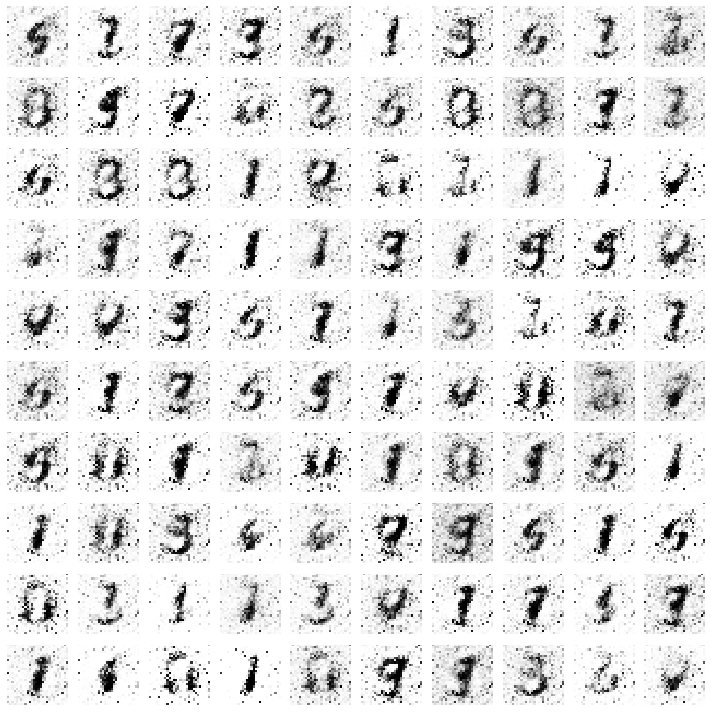

--------------- Epochs 1 ---------------


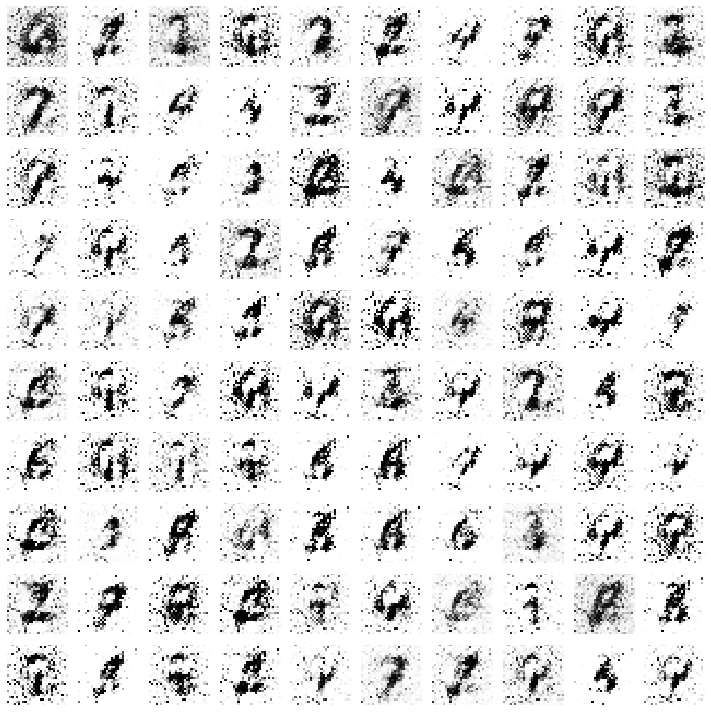

--------------- Epochs 2 ---------------
--------------- Epochs 3 ---------------
--------------- Epochs 4 ---------------
--------------- Epochs 5 ---------------
--------------- Epochs 6 ---------------
--------------- Epochs 7 ---------------
--------------- Epochs 8 ---------------
--------------- Epochs 9 ---------------
--------------- Epochs 10 ---------------
--------------- Epochs 11 ---------------
--------------- Epochs 12 ---------------
--------------- Epochs 13 ---------------
--------------- Epochs 14 ---------------
--------------- Epochs 15 ---------------
--------------- Epochs 16 ---------------
--------------- Epochs 17 ---------------
--------------- Epochs 18 ---------------
--------------- Epochs 19 ---------------
--------------- Epochs 20 ---------------


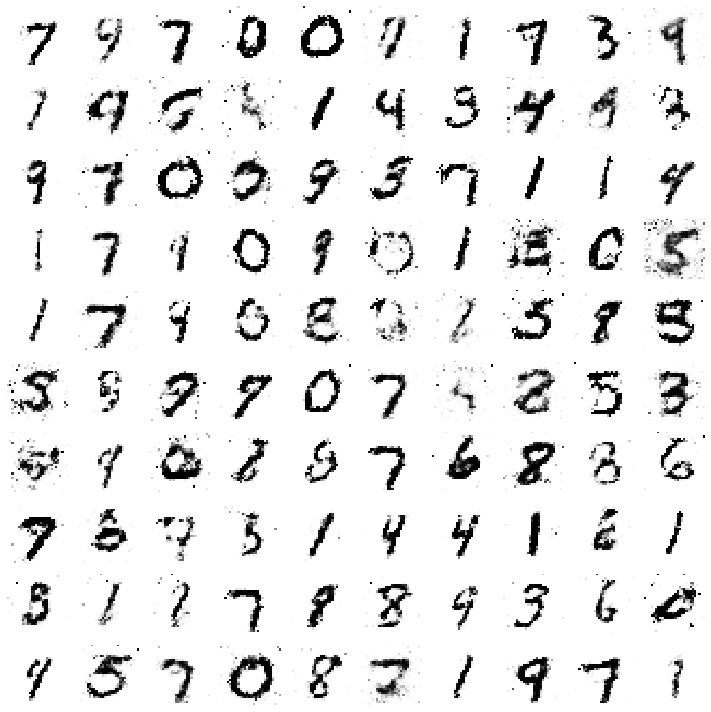

--------------- Epochs 21 ---------------
--------------- Epochs 22 ---------------
--------------- Epochs 23 ---------------
--------------- Epochs 24 ---------------
--------------- Epochs 25 ---------------


KeyboardInterrupt: ignored

In [17]:
train(100,128)